# 2-4 Segmentation

In [1]:
!pip3 install --upgrade mxnet-cu101 > /dev/null
!pip3 install --upgrade gluoncv > /dev/null

## 테스트이미지
- <img src='https://github.com/karolmajek/Mask_RCNN/blob/master/images/2516944023_d00345997d_z.jpg?raw=true' /> 

- <img src='https://github.com/dmlc/web-data/blob/master/gluoncv/detection/biking.jpg?raw=true' width=640 /> 

- <img src='https://github.com/karolmajek/Mask_RCNN/blob/master/images/8433365521_9252889f9a_z.jpg?raw=true' />

## Instance Segmentation
- Mask RCNN

In [2]:
from matplotlib import pyplot as plt
from gluoncv import model_zoo, data, utils

### Mask RCNN Framework
<img src='https://www.researchgate.net/publication/337746202/figure/fig2/AS:832550465449984@1575506907034/The-Framework-of-Mask-R-CNN-55.png' width=100% />

### model loading

In [3]:
net = model_zoo.get_model('mask_rcnn_resnet50_v1b_coco', pretrained=True)

### image download

In [4]:
im_fname = utils.download('https://github.com/dmlc/web-data/blob/master/gluoncv/detection/biking.jpg?raw=true',   path='biking.jpg')
x, orig_img = data.transforms.presets.rcnn.load_test(im_fname)

### inference and display

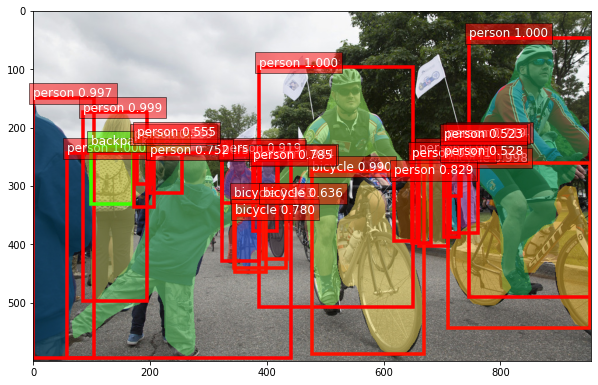

In [5]:
ids, scores, bboxes, masks = [xx[0].asnumpy() for xx in net(x)]

# paint segmentation mask on images directly
width, height = orig_img.shape[1], orig_img.shape[0]
masks, _ = utils.viz.expand_mask(masks, bboxes, (width, height), scores)
orig_img = utils.viz.plot_mask(orig_img, masks)

# identical to Faster RCNN object detection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax = utils.viz.plot_bbox(orig_img, bboxes, scores, ids,
                         class_names=net.classes, ax=ax)
plt.show()

### 처리 함수 정의

In [6]:
def display_instance_segmentation(model_name, image_filename):
  import time
  from matplotlib import pyplot as plt
  from gluoncv import model_zoo, data, utils

  net = model_zoo.get_model(model_name, pretrained=True)

  tic = time.time()
  x, orig_img = data.transforms.presets.rcnn.load_test(image_filename)

  ids, scores, bboxes, masks = [xx[0].asnumpy() for xx in net(x)]

  # paint segmentation mask on images directly
  width, height = orig_img.shape[1], orig_img.shape[0]
  masks, _ = utils.viz.expand_mask(masks, bboxes, (width, height), scores)
  orig_img = utils.viz.plot_mask(orig_img, masks)

  # identical to Faster RCNN object detection
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(1, 1, 1)
  ax = utils.viz.plot_bbox(orig_img, bboxes, scores, ids,
                          class_names=net.classes, ax=ax)
  plt.show()
  
  print('process time : {}'.format(time.time() - tic))

### image test

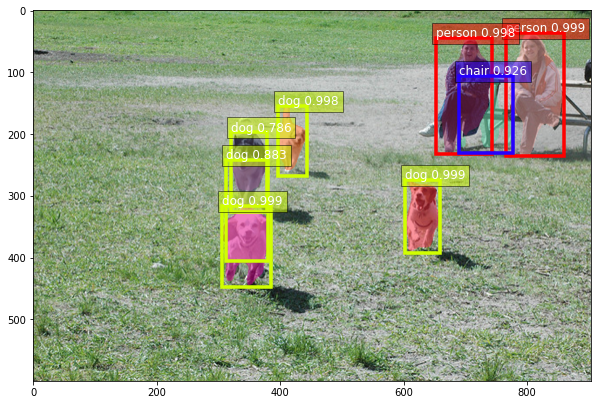

process time : 81.81184315681458


In [7]:
im_fname = utils.download('https://github.com/karolmajek/Mask_RCNN/blob/master/images/2516944023_d00345997d_z.jpg?raw=true')
display_instance_segmentation('mask_rcnn_resnet50_v1b_coco', im_fname)

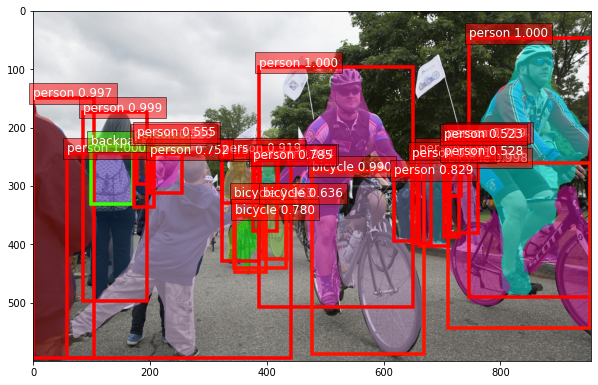

process time : 81.9261908531189


In [8]:
im_fname = utils.download('https://github.com/dmlc/web-data/blob/master/gluoncv/detection/biking.jpg?raw=true')
display_instance_segmentation('mask_rcnn_resnet50_v1b_coco', im_fname)

100%|██████████| 178/178 [00:00<00:00, 6091.65KB/s]

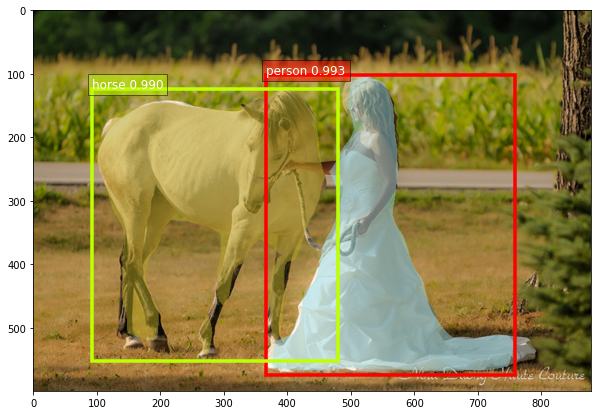

process time : 80.69018959999084


In [9]:
im_fname = utils.download('https://github.com/karolmajek/Mask_RCNN/blob/master/images/8433365521_9252889f9a_z.jpg?raw=true')
display_instance_segmentation('mask_rcnn_resnet50_v1b_coco', im_fname)

### [Mark-RCNN-Shiny](https://github.com/huuuuusy/Mask-RCNN-Shiny)
<img src='https://github.com/huuuuusy/Mask-RCNN-Shiny/blob/master/demo/nikki.gif?raw=true' />

## Semantic Segmentation - FCN
- Fully Convolutional Networks

### FCN Framework
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fc2rRKu%2FbtqvFhluGR4%2FL0t8Da4wcUNJzkxPmzH6tk%2Fimg.jpg' />

In [10]:
import mxnet as mx
from mxnet import image
from mxnet.gluon.data.vision import transforms
import gluoncv
# using cpu
ctx = mx.cpu(0) 

In [11]:
model = gluoncv.model_zoo.get_model('fcn_resnet101_voc', pretrained=True)

100121KB [00:02, 41219.57KB/s]                           


197333KB [00:04, 49084.19KB/s]                            


### FCN Layers

In [12]:
model.summary

<bound method Block.summary of FCN(
  (conv1): HybridSequential(
    (0): Conv2D(3 -> 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=64)
    (2): Activation(relu)
    (3): Conv2D(64 -> 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=64)
    (5): Activation(relu)
    (6): Conv2D(64 -> 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (bn1): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=128)
  (relu): Activation(relu)
  (maxpool): MaxPool2D(size=(3, 3), stride=(2, 2), padding=(1, 1), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)
  (layer1): HybridSequential(
    (0): BottleneckV1b(
      (conv1): Conv2D(128 -> 64, kernel_size=(1, 1), stride=(1, 1), bias

### Image Download

In [13]:
im_fname = gluoncv.utils.download('https://github.com/karolmajek/Mask_RCNN/blob/master/images/2516944023_d00345997d_z.jpg?raw=true')

### image pre transforming

In [14]:
img = image.imread(im_fname)

from gluoncv.data.transforms.presets.segmentation import test_transform
img = test_transform(img, ctx)

In [15]:
output = model.predict(img)
predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()

In [16]:
from gluoncv.utils.viz import get_color_pallete
import matplotlib.image as mpimg
mask = get_color_pallete(predict, 'pascal_voc')
mask.save('output.png')

In [17]:
type(mask)

PIL.Image.Image

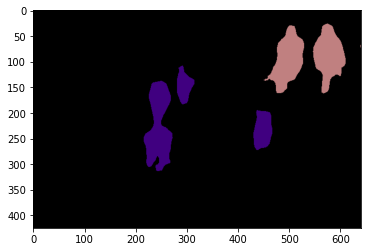

In [18]:
mmask = mpimg.imread('output.png')
plt.imshow(mmask)
plt.show()

### 처리 함수 정의

In [19]:
def display_semantic_segmentation(model_name, image_filename, color_pallete='pascal_voc'):
  import time
  import mxnet as mx
  from mxnet import image
  from mxnet.gluon.data.vision import transforms
  from matplotlib import pyplot as plt
  import gluoncv
  from gluoncv.utils.viz import get_color_pallete
  import matplotlib.image as mpimg

  # using cpu
  ctx = mx.cpu(0) 

  # model download
  model = gluoncv.model_zoo.get_model(model_name, pretrained=True)

  tic = time.time()
  # image loading
  img = image.imread(image_filename)

  # image pre transforming
  from gluoncv.data.transforms.presets.segmentation import test_transform
  img = test_transform(img, ctx)

  # inference
  output = model.predict(img)
  predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()

  # display

  mask = get_color_pallete(predict, color_pallete)
  mask.save('output.png')

  mmask = mpimg.imread('output.png')
  plt.imshow(mmask)
  plt.show()
  
  print('process time : {}'.format(time.time() - tic))


### image test

In [20]:
import gluoncv

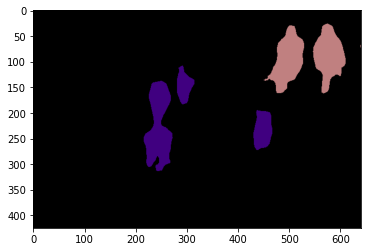

process time : 9.694607019424438


In [21]:
im_fname = utils.download('https://github.com/karolmajek/Mask_RCNN/blob/master/images/2516944023_d00345997d_z.jpg?raw=true')
display_semantic_segmentation('fcn_resnet101_voc', im_fname)

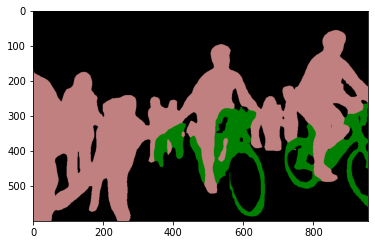

process time : 19.070559978485107


In [22]:
im_fname = gluoncv.utils.download('https://github.com/dmlc/web-data/blob/master/gluoncv/detection/biking.jpg?raw=true')
display_semantic_segmentation('fcn_resnet101_voc', im_fname)

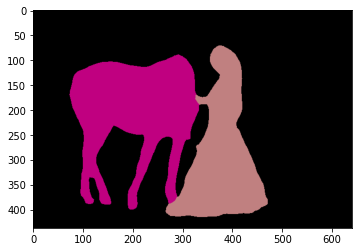

process time : 9.493970155715942


In [23]:
im_fname = gluoncv.utils.download('https://github.com/karolmajek/Mask_RCNN/blob/master/images/8433365521_9252889f9a_z.jpg?raw=true')
display_semantic_segmentation('fcn_resnet101_voc', im_fname)

## Semantic Segmentation -PSPNet
- Pyramid Scene Parsing network

### PSP Network Framework
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fba73Zm%2Fbtqwl64dcBn%2FV6cr71k8IvxQ71J9MmfrM1%2Fimg.png' width=100% />

In [24]:
import mxnet as mx
from mxnet import image
from mxnet.gluon.data.vision import transforms
import gluoncv
# using cpu
ctx = mx.cpu(0)

In [25]:
model = gluoncv.model_zoo.get_model('psp_resnet101_ade', pretrained=True)

self.crop_size 480


100%|██████████| 266773/266773 [00:05<00:00, 51170.76KB/s]


### psp network layer

In [26]:
model.summary

<bound method Block.summary of PSPNet(
  (conv1): HybridSequential(
    (0): Conv2D(3 -> 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=64)
    (2): Activation(relu)
    (3): Conv2D(64 -> 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=64)
    (5): Activation(relu)
    (6): Conv2D(64 -> 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (bn1): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=128)
  (relu): Activation(relu)
  (maxpool): MaxPool2D(size=(3, 3), stride=(2, 2), padding=(1, 1), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)
  (layer1): HybridSequential(
    (0): BottleneckV1b(
      (conv1): Conv2D(128 -> 64, kernel_size=(1, 1), stride=(1, 1), b

### image download

In [27]:
im_fname = gluoncv.utils.download('https://github.com/karolmajek/Mask_RCNN/blob/master/images/2516944023_d00345997d_z.jpg?raw=true')

In [28]:
img = image.imread(im_fname)

### image transform

In [29]:
from gluoncv.data.transforms.presets.segmentation import test_transform
img = test_transform(img, ctx)

### inference

In [30]:
output = model.predict(img)
predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()

In [31]:
from gluoncv.utils.viz import get_color_pallete
import matplotlib.image as mpimg
mask = get_color_pallete(predict, 'ade20k')
mask.save('output.png')

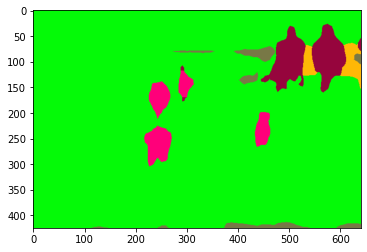

In [32]:
from matplotlib import pyplot as plt
mmask = mpimg.imread('output.png')
plt.imshow(mmask)
plt.show()

### image test

self.crop_size 480


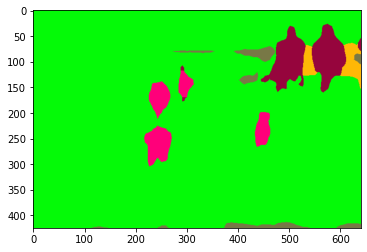

process time : 10.754199266433716


In [33]:
im_fname = utils.download('https://github.com/karolmajek/Mask_RCNN/blob/master/images/2516944023_d00345997d_z.jpg?raw=true')
display_semantic_segmentation('psp_resnet101_ade',im_fname, 'ade20k')

self.crop_size 480


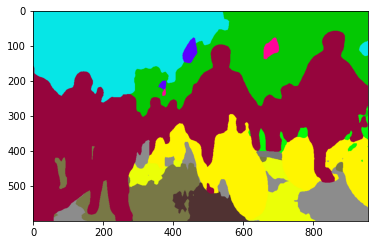

process time : 22.163477420806885


In [34]:
im_fname = gluoncv.utils.download('https://github.com/dmlc/web-data/blob/master/gluoncv/detection/biking.jpg?raw=true')
display_semantic_segmentation('psp_resnet101_ade',im_fname, 'ade20k')

self.crop_size 480


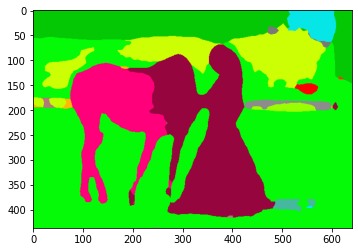

process time : 10.900503158569336


In [35]:
im_fname = gluoncv.utils.download('https://github.com/karolmajek/Mask_RCNN/blob/master/images/8433365521_9252889f9a_z.jpg?raw=true')
display_semantic_segmentation('psp_resnet101_ade',im_fname, 'ade20k')

## Semantic Segmentation - DeepLabV3

In [36]:
import mxnet as mx
from mxnet import image
from mxnet.gluon.data.vision import transforms
import gluoncv
from matplotlib import pyplot as plt

# using cpu
ctx = mx.cpu(0)

In [37]:
model = gluoncv.model_zoo.get_model('deeplab_resnet101_ade', pretrained=True)

100%|██████████| 221969/221969 [00:04<00:00, 49450.46KB/s]


### Deeplab framework
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fcw5eBB%2FbtqBMNYTJYZ%2FFhQ4uwqp6TQeotgozZOIlk%2Fimg.png' />

### deeplab layer

In [38]:
model.summary

<bound method Block.summary of DeepLabV3(
  (conv1): HybridSequential(
    (0): Conv2D(3 -> 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=64)
    (2): Activation(relu)
    (3): Conv2D(64 -> 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=64)
    (5): Activation(relu)
    (6): Conv2D(64 -> 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (bn1): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=128)
  (relu): Activation(relu)
  (maxpool): MaxPool2D(size=(3, 3), stride=(2, 2), padding=(1, 1), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)
  (layer1): HybridSequential(
    (0): BottleneckV1b(
      (conv1): Conv2D(128 -> 64, kernel_size=(1, 1), stride=(1, 1)

### image download

In [39]:
im_fname = gluoncv.utils.download('https://github.com/karolmajek/Mask_RCNN/blob/master/images/2516944023_d00345997d_z.jpg?raw=true')

In [40]:
img = image.imread(im_fname)

### image pre transforming

In [41]:
from gluoncv.data.transforms.presets.segmentation import test_transform
img = test_transform(img, ctx)

### inference

In [42]:
output = model.predict(img)
predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()

### display image

In [43]:
from gluoncv.utils.viz import get_color_pallete
import matplotlib.image as mpimg
mask = get_color_pallete(predict, 'ade20k')
mask.save('output.png')

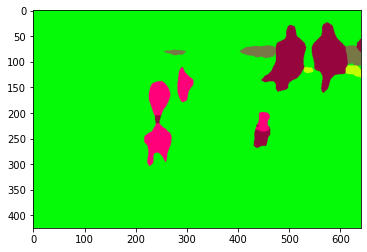

In [44]:
mmask = mpimg.imread('output.png')
plt.imshow(mmask)
plt.show()

### image test

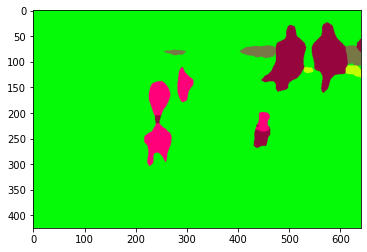

process time : 11.634135246276855


In [45]:
im_fname = gluoncv.utils.download('https://github.com/karolmajek/Mask_RCNN/blob/master/images/2516944023_d00345997d_z.jpg?raw=true')
display_semantic_segmentation('deeplab_resnet101_ade',im_fname, 'ade20k')

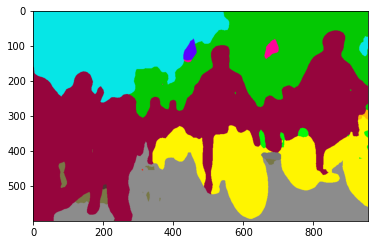

process time : 24.14798378944397


In [46]:
im_fname = gluoncv.utils.download('https://github.com/dmlc/web-data/blob/master/gluoncv/detection/biking.jpg?raw=true')
display_semantic_segmentation('deeplab_resnet101_ade',im_fname, 'ade20k')

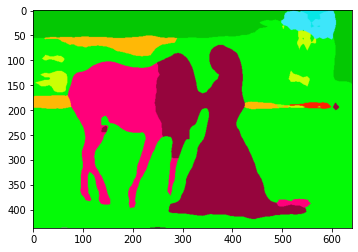

process time : 12.471028566360474


In [47]:
im_fname = gluoncv.utils.download('https://github.com/karolmajek/Mask_RCNN/blob/master/images/8433365521_9252889f9a_z.jpg?raw=true')
display_semantic_segmentation('deeplab_resnet101_ade',im_fname, 'ade20k')

## 실습
- 아래의 이미지를 각각의 모델로 분석하세요
- instance Segmentation(Mask RCNN)
- Semantic Segmentation(FCN, PSPNet, DeepLabv3)

<img src='https://imgnews.pstatic.net/image/077/2020/12/17/PAP20201217074101055_P2_20201217055630293.jpg' />

In [48]:
image = 'https://imgnews.pstatic.net/image/077/2020/12/17/PAP20201217074101055_P2_20201217055630293.jpg'

47KB [00:00, 1928.76KB/s]             


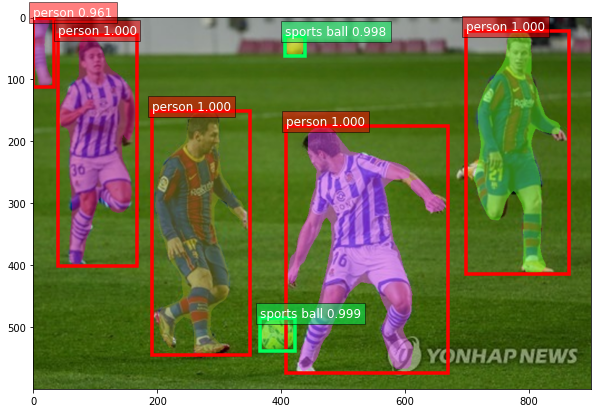

process time : 83.81439447402954


In [49]:
im_fname = utils.download(image)
display_instance_segmentation('mask_rcnn_resnet50_v1b_coco', im_fname)

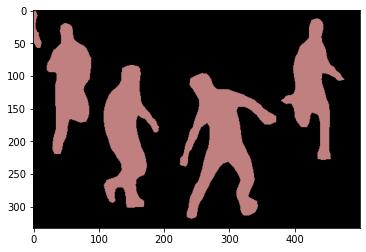

process time : 6.054826974868774


In [50]:
im_fname = utils.download(image)
display_semantic_segmentation('fcn_resnet101_voc', im_fname)

self.crop_size 480


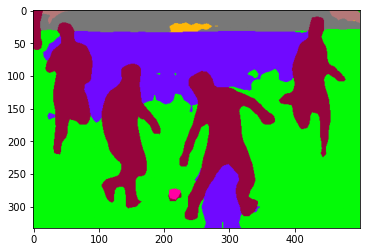

process time : 6.886972427368164


In [51]:
im_fname = utils.download(image)
display_semantic_segmentation('psp_resnet101_ade',im_fname, 'ade20k')

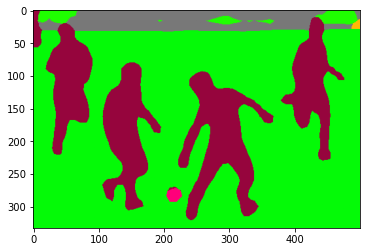

process time : 7.1952879428863525


In [52]:
im_fname = gluoncv.utils.download(image)
display_semantic_segmentation('deeplab_resnet101_ade',im_fname, 'ade20k')

## 이미지에 마스크 overlay

In [53]:
def display_semantic_segmentation_mask(model_name, image_filename, color_pallete='pascal_voc'):
  import time
  import mxnet as mx
  from mxnet import image
  from mxnet.gluon.data.vision import transforms
  from matplotlib import pyplot as plt
  import gluoncv
  from gluoncv.utils.viz import get_color_pallete
  import matplotlib.image as mpimg

  # using cpu
  ctx = mx.cpu(0) 

  # model download
  model = gluoncv.model_zoo.get_model(model_name, pretrained=True)

  tic = time.time()
  # image loading(원본이미지를 그대로 불러옴.)
  _, org_image = gluoncv.data.transforms.presets.rcnn.load_test(im_fname)
  img = mx.nd.array(org_image) 

  # image pre transforming
  from gluoncv.data.transforms.presets.segmentation import test_transform
  img = test_transform(img, ctx)

  # inference
  output = model.predict(img)
  predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()

  # display
  mask = get_color_pallete(predict, color_pallete)
  mask.save('output.png')
  mask_img = image.imread('output.png')
  
  #mask image와 원본이미지 합치기 투명도 0.8
  mask_img = gluoncv.utils.viz.cv_merge_two_images(org_image, mask_img, alpha=0.8)

  # 좌측 원본 우측 합친 이미지 출력
  fig = plt.figure(figsize=(15,15))
  ax1 = fig.add_subplot(1,2,1)
  ax1 = gluoncv.utils.viz.plot_image(org_image, ax=ax1)
  ax1.set_title('original')
  ax1.axis("off")
  ax2 = fig.add_subplot(1,2,2)
  ax2 = gluoncv.utils.viz.plot_image(mask_img, ax=ax2)
  ax2.set_title('segmentation')
  ax2.axis("off")
  plt.show()
  
  print('process time : {}'.format(time.time() - tic))

### image test

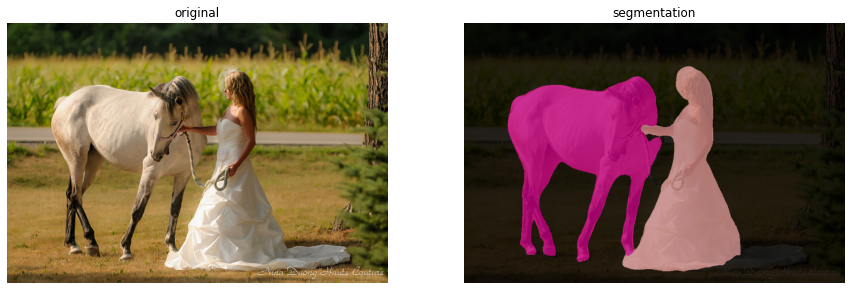

process time : 18.357232332229614


In [54]:
im_fname = gluoncv.utils.download('https://github.com/karolmajek/Mask_RCNN/blob/master/images/8433365521_9252889f9a_z.jpg?raw=true')
display_semantic_segmentation_mask('fcn_resnet101_voc',im_fname, 'pascal_voc')

self.crop_size 480


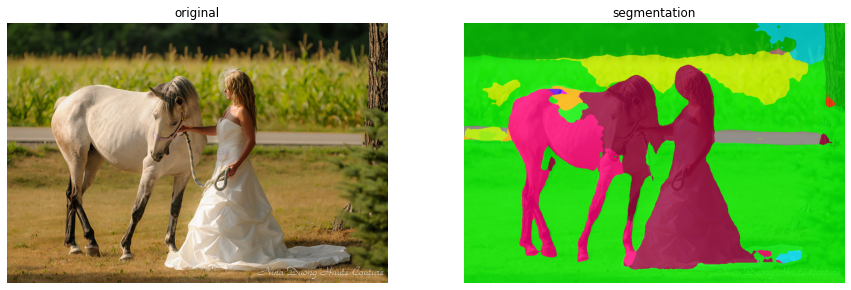

process time : 21.11432719230652


In [55]:
im_fname = gluoncv.utils.download('https://github.com/karolmajek/Mask_RCNN/blob/master/images/8433365521_9252889f9a_z.jpg?raw=true')
display_semantic_segmentation_mask('psp_resnet101_ade',im_fname, 'ade20k')

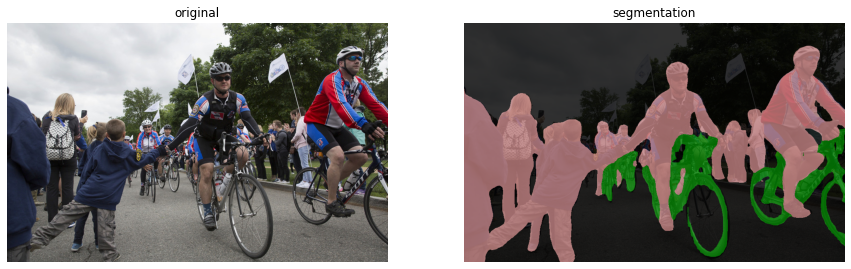

process time : 19.438593864440918


In [56]:
im_fname = gluoncv.utils.download('https://github.com/dmlc/web-data/blob/master/gluoncv/detection/biking.jpg?raw=true')
display_semantic_segmentation_mask('fcn_resnet101_voc',im_fname, 'pascal_voc')

self.crop_size 480


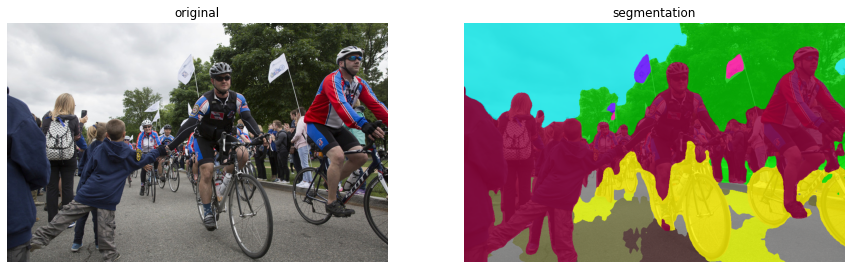

process time : 22.225905895233154


In [57]:
im_fname = gluoncv.utils.download('https://github.com/dmlc/web-data/blob/master/gluoncv/detection/biking.jpg?raw=true')
display_semantic_segmentation_mask('psp_resnet101_ade',im_fname, 'ade20k')

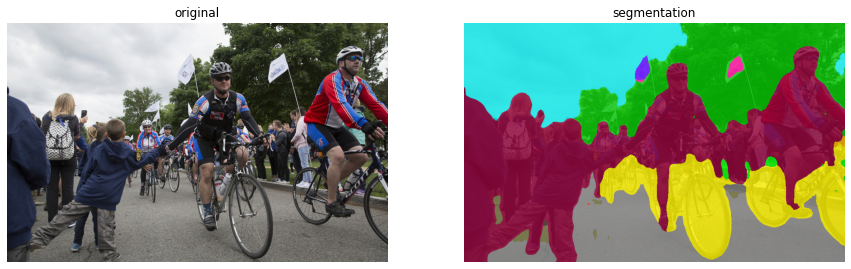

process time : 23.867590188980103


In [58]:
im_fname = gluoncv.utils.download('https://github.com/dmlc/web-data/blob/master/gluoncv/detection/biking.jpg?raw=true')
display_semantic_segmentation_mask('deeplab_resnet101_ade',im_fname, 'ade20k')

  0%|          | 0/118 [00:00<?, ?KB/s]

119KB [00:00, 5127.62KB/s]             


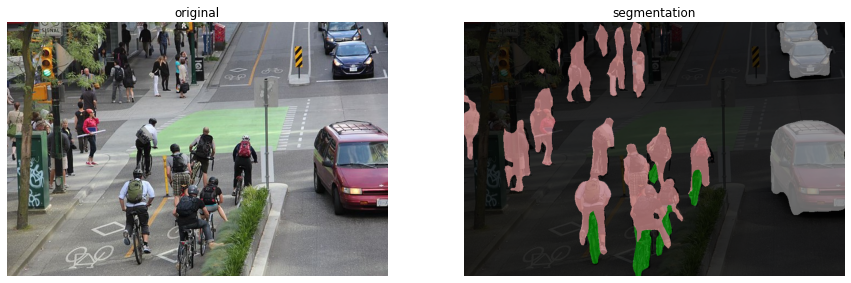

process time : 18.92742371559143


In [59]:
im_fname = gluoncv.utils.download('https://miro.medium.com/max/700/1*hO_md3xNtcncjAmGrTwxYA.jpeg')
display_semantic_segmentation_mask('fcn_resnet101_voc',im_fname, 'pascal_voc')

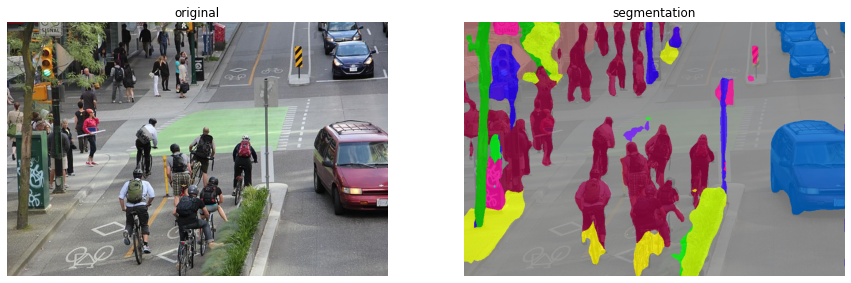

process time : 22.696977138519287


In [60]:
im_fname = gluoncv.utils.download('https://miro.medium.com/max/700/1*hO_md3xNtcncjAmGrTwxYA.jpeg')
display_semantic_segmentation_mask('deeplab_resnet101_ade',im_fname, 'ade20k')

self.crop_size 480


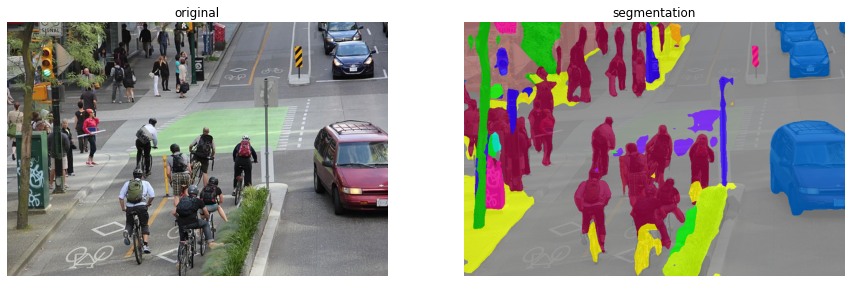

process time : 21.94883418083191


In [61]:
im_fname = gluoncv.utils.download('https://miro.medium.com/max/700/1*hO_md3xNtcncjAmGrTwxYA.jpeg')
display_semantic_segmentation_mask('psp_resnet101_ade',im_fname, 'ade20k')